<a href="https://colab.research.google.com/github/Rakeshannam7179/Legal-Chatbot/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy transformers torch matplotlib wordcloud


In [2]:
import tweepy
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [5]:
api_key = "ND6tChJT3EMuRGRBJpmKT3OEv"
api_secret = "O2CaYTyoX10V7uDvdj1bfNPMvTvrfPje56yaKBQNMVzFX8tlBv"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGEr6wEAAAAAX0l73JUNlN0q8dTfyVo4m9kjCeg%3DE6vrjp7bPf5r1Jvdnh7sEQMoKjyEQT3FI3k8npxGPQpqQQZ9Wt"
client = tweepy.Client(bearer_token=bearer_token)



In [6]:
query = "school -is:retweet lang:en"
tweets = client.search_recent_tweets(query=query, max_results=10)

tweet_texts = [tweet.text for tweet in tweets.data]
print("Collected Tweets:")
for t in tweet_texts:
    print("-", t)


Collected Tweets:
- @AprilSpark1890 if your saying bruh, you  need to be in school
- @MkEarthGr8Agn @kangminjlee + calling black ice agents house n!ggg3rs  and saying they are only deporting brown people. These people are truly insane. 

Also using little pre school kids to protest ice 🤦‍♂️
- Been saying this since his high school days. Riley is a legit guy https://t.co/IC4fB0APXH
- 🚨⚾️ GAMEDAY ⚾️🚨

🖤🤍 RAIDER NATION 🤍🖤
Your PSJA North Raiders are HITTING THE ROAD 🚌💨
as we head to 🐝 Edcouch-Elsa to take on the Yellow Jackets 💥

🕕 First Pitch: 6:00 PM
📍 Location: Edcouch-Elsa High School

Lock in. Bring the energy. Rep the Black &amp; Silver. https://t.co/FUrxQTopzz
- @atrupar This mofo has never been to school. Fred bought all his education.
- school and get elected if they care so much. Go get paid as an Activist out somewhere, for a Non-Profit. Want Google styled calmness and vibes. For everyone who becomes a colleague of mine - the Christian who grew up in Texas, the Pakistani with '

In [12]:
# Step 5: Load emotion analysis model (with all scores)
emotion_analyzer = pipeline("text-classification",
                            model="j-hartmann/emotion-english-distilroberta-base",
                            return_all_scores=True)

# Step 6: Analyze emotions and store results
all_emotions = {}
for t in tweet_texts:
    # emotion_analyzer(t) returns a list of lists of dictionaries for multiple texts,
    # or a list of dictionaries for a single text when return_all_scores=True.
    # However, the kernel state indicates that for the failing case, result (emotion_analyzer(t)[0]) was a single dictionary.

    result_for_current_text = emotion_analyzer(t)[0] # This variable corresponds to 'result' in the traceback

    if isinstance(result_for_current_text, list):
        # If it's a list of dictionaries (as expected with return_all_scores=True for all emotions)
        top_emotion = max(result_for_current_text, key=lambda x: x['score'])['label']
    elif isinstance(result_for_current_text, dict):
        # If it's a single dictionary (as suggested by the kernel state causing the TypeError)
        top_emotion = result_for_current_text['label']
    else:
        # Fallback for unexpected types
        top_emotion = "unknown" # Or handle as an error
        print(f"Warning: Unexpected type for emotion analysis result: {type(result_for_current_text)}")

    all_emotions[top_emotion] = all_emotions.get(top_emotion, 0) + 1

# Print the emotion distribution
print("\nEmotion Distribution:")
for emotion, count in all_emotions.items():
    print(f"- {emotion}: {count}")

Loading weights:   0%|          | 0/105 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: j-hartmann/emotion-english-distilroberta-base
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.



Emotion Distribution:
- neutral: 4
- fear: 2
- surprise: 1
- joy: 1
- sadness: 1
- anger: 1


In [13]:
emoji_map = {
    "joy": "😀",
    "sadness": "😢",
    "anger": "😡",
    "fear": "😨",
    "surprise": "😲",
    "love": "❤️",
    "neutral": "😐"
}


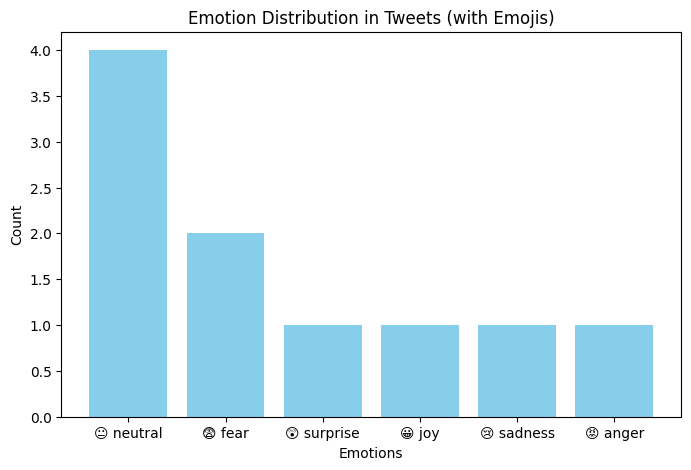

In [14]:
labels = [emoji_map.get(e, "") + " " + e for e in all_emotions.keys()]
plt.figure(figsize=(8,5))
plt.bar(labels, all_emotions.values(), color='skyblue')
plt.title("Emotion Distribution in Tweets (with Emojis)")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()


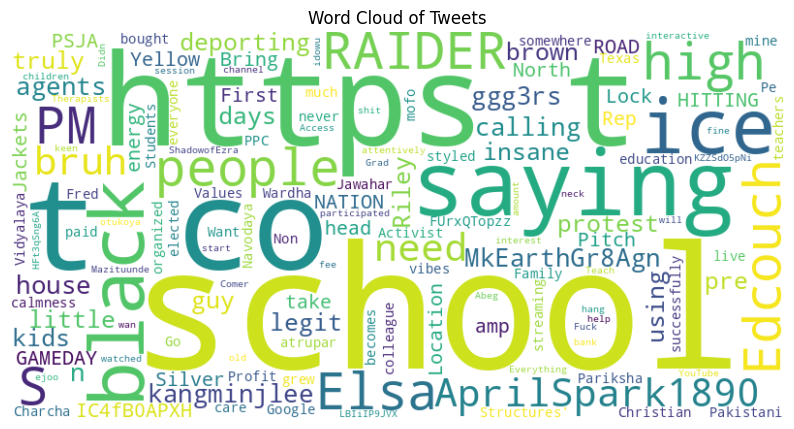

In [17]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()


In [16]:
all_tweet_text = " ".join(tweet_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweet_text)